<a href="https://colab.research.google.com/github/Vinuji-Hewapathirana/Machine-Learning---Coursework/blob/main/ML_NN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# Load data
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# Drop the 'duration', 'contact' columns
data = data.drop(columns=['duration', 'contact'])

# Display the first few rows to verify
data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Prepare features and target
#encoding the y attribute
X = data.drop(columns=['y'])
y = data['y'].map({'yes': 1, 'no': 0}).astype(int)

Class Weights: {0: 0.5634790341336616, 1: 4.438308189655173}
Epoch 1/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7610 - auc: 0.7271 - loss: 0.6272 - val_accuracy: 0.8029 - val_auc: 0.7938 - val_loss: 0.5546
Epoch 2/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8007 - auc: 0.7744 - loss: 0.5551 - val_accuracy: 0.8134 - val_auc: 0.7994 - val_loss: 0.5348
Epoch 3/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8089 - auc: 0.7805 - loss: 0.5501 - val_accuracy: 0.8449 - val_auc: 0.7999 - val_loss: 0.5218
Epoch 4/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8230 - auc: 0.7799 - loss: 0.5485 - val_accuracy: 0.8403 - val_auc: 0.8006 - val_loss: 0.4735
Epoch 5/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8284 - auc: 0.7924 - loss: 0.5392 - val_accuracy: 0.8536 - val_auc: 0.8025 - val_loss: 0.5197
Epoch 6/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8275 - auc: 0.7962 - loss: 0.5399 - val_accuracy: 0.8507 - va

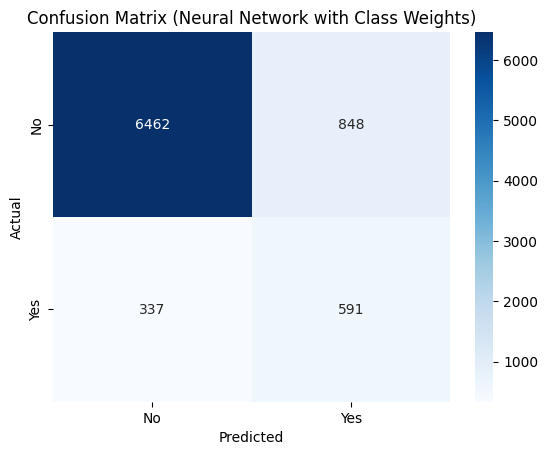

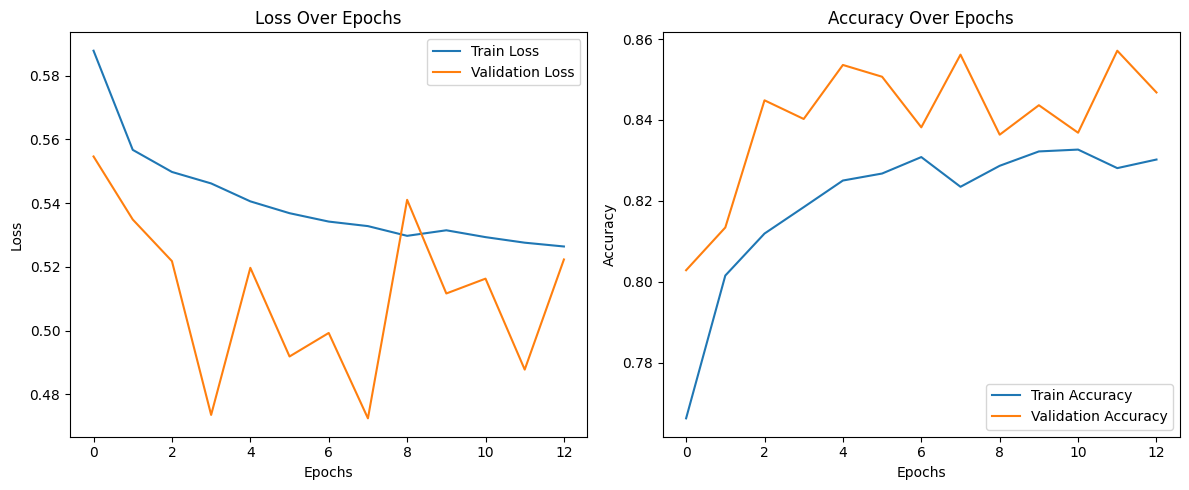

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Transform data using preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Correct class_weights_dict construction
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}
print("Class Weights:", class_weights_dict)

# Ensure input is dense
import scipy.sparse
if isinstance(X_train_transformed, scipy.sparse.spmatrix):
    X_train_transformed = X_train_transformed.toarray()
    X_test_transformed = X_test_transformed.toarray()

# Ensure y_train is a dense NumPy array
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# Define the Neural Network model
#input_dim = X_train_transformed.shape[1]
#model = Sequential([
 #   tf.keras.Input(shape=(input_dim,)),  # Specify input shape
  #  Dense(64, activation='relu'),
   # Dropout(0.2),
    #Dense(32, activation='relu'),
    #Dropout(0.2),
    #Dense(1, activation='sigmoid')  # Binary classification
#])

from tensorflow.keras.layers import BatchNormalization

# Define the Neural Network model
input_dim = X_train_transformed.shape[1]
model = Sequential([
    tf.keras.Input(shape=(input_dim,)),  # Specify input shape
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Train the model with EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_transformed, y_train,
    validation_data=(X_test_transformed, y_test),
    epochs=50, batch_size=32,
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

# Evaluate the model
y_pred_prob = model.predict(X_test_transformed).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report (Neural Network with Class Weights)")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score (Neural Network):", roc_auc_score(y_test, y_pred_prob))

# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix (Neural Network with Class Weights)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()